In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fc-cache: succeeded


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/2022/dacon/구내식당식수인원예측경진대회

/content/drive/MyDrive/2022/dacon/구내식당식수인원예측경진대회


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns
import datetime

In [5]:
plt.rc('font', family='NanumBarunGothic') 

In [6]:
train = pd.read_csv("data/train.csv") 
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [7]:
train2 = train[:]

In [243]:
lunch = []
dinner = []

for i in range(len(train2)):
    menu1 = train2['중식메뉴'][i]
    tmp1 = menu1.split(' ') # 공백으로 문자열 구분 
    tmp1 = ' '.join(tmp1).split()    # 빈 원소 삭제

    menu2 = train2['석식메뉴'][i]
    tmp2 = menu2.split(' ') # 공백으로 문자열 구분 
    tmp2 = ' '.join(tmp2).split()    # 빈 원소 삭제

    word1 = [word for word in tmp1 if not word.startswith('(') and not word.endswith(')')]
    word2 = [word for word in tmp2 if not word.startswith('(') and not word.endswith(')')]

    lunch.append(word1)
    dinner.append(word2)

In [247]:
lunch[:10]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치']]

In [248]:
dinner[:10]

[['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치'],
 ['참치회덮밥', '맑은국', '군만두', '과일샐러드', '락교', '포기김치'],
 ['쌀밥/잡곡밥', '김치콩나물국', '미니함박', '어묵볶음', '물파래무침', '깍두기'],
 ['쌀밥/잡곡밥', '홍합미역국', '등갈비김치찜', '임연수구이', '브로컬리초장', '포기김치'],
 ['쌀밥/잡곡밥', '된장찌개', '쇠불고기', '해파리겨자채', '봄동무침', '포기김치'],
 ['볶음밥*자장소스', '맑은국', '새우또띠아', '쨔샤이무침', '요플레', '포기김치']]

In [244]:
for d in lunch:
  index1, index2 = 0, 0
  if len(d) == 8:
    for a in range(len(d)):
      if d[a].endswith('/'):
        d[a] = d[a] + d[a+1]
        index1 = a+1
      
      if d[a].endswith('의'):
        d[a] = d[a] + d[a+1]
        index2 = a+1

    if index1 != 0:
      del d[index1]

    if index2 != 0:
      del d[index2]
    print(d)

['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새우튀김', '참나물땅콩가루무침', '청포도', '열무김치']
['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러드', '양배추,케일*우렁쌈장', '식혜', '깍두기']
['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이', '가지나물무침', '오미자주스', '배추겉절이']
['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈제샐러드', '두릅새송이초무침', '자몽에이드', '알타리김치']
['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐러드', '문어오이미역초무침', '요거트드링킹', '포기김치']
['쌀밥/곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채', '삼색물만두무침', '겉절이김치/양념장', '견과류샐러드*요거트D']
['쌀밥/흑미밥/찰현미밥', '팽이된장국', '오징어볶음', '고기완자전*케찹', '이연복의청경채찜', '포기김치', '양상추샐러드*키위D']


In [245]:
for d in dinner:
  index1, index2 = 0, 0
  if len(d) == 7:
    for a in range(len(d)):
      if d[a].startswith('*'):
        d[a-1] = d[a-1]+d[a]
        index1 = a
      if d[a].endswith('/'):
        d[a] = d[a] + d[a+1]
        index2 = a+1

    if index1 != 0:
      del d[index1]

    if index2 != 0:
      del d[index2]
    print(d)

['참치주먹밥', '김치우동', '쇠고기퀘사디아', '구운채소*발사믹소스', '과일', '알타리김치']
['쌀밥/잡곡밥', '열무된장국', '돼지갈비찜', '오징어브로컬리*초장', '취나물', '포기김치']
['쌀밥/잡곡밥', '차돌박이찌개', '치킨텐더', '꽃맛살볶음', '비름나물*천도복숭아', '포기김치']
['쌀밥/잡곡밥', '옛날돈까스', '브로컬리크림스프', '키위드레싱샐러드', '고구마범벅/무피클', '음료', '포기김치']
['닭갈비볶음밥', '가쯔오장국', '크림카레우동', '감자만두/샐러드*흑임자드레싱', '비트무생채', '포기김치']
['볶음밥/짜장소스', '맑은국', '고추잡채*꽃빵', '컬리플라워샐러드*망고드레싱', '단무지', '포기김치']
['쌀밥/잡곡밥', '옛날돈까스', '미소장국', '딸기드레싱샐러드', '감자범벅/무피클', '주스', '포기김치']
['굴소스볶음밥', '토마토스파게티', '크림스프', '마늘빵/감자튀김', '수제오이피클', '요구르트', '포기김치']
['쌀밥/잡곡밥', '뼈감자탕', '해물파전', '고추,양파/쌈장', '부추생채', '귤', '석박지']
['쌀밥/잡곡밥', '두부미소된장국', '오리훈제마늘볶음', '무쌈깻잎', '코다리강정', '오이소박이', '포기김치']
['쌀밥/잡곡밥', '감자만두국', '꽃삼겹김치찜', '꿔바로우탕수육*소스', '해파리냉채', '토마토설탕절인', '깍두기']
['쌀밥/잡곡밥', '홍합무우국', '로제찜닭*마늘빵', '계란장조림', '숙주미나리무침', '연근흑임자샐러드', '배추김치']
['쌀밥/잡곡밥', '다슬기아욱국', '갈릭파닭', '돈채호박볶음', '짠지오이무침', '요구르트', '포기김치']
['땡초주먹밥', '근대두부된장국', '치킨텐더', '루꼴라샐러드', '쫑상추새콤무침', '망고주스', '포기김치']
['김치볶음밥', '유부된장국', '새우로제파스타', '계란후라이', '취나물무침', '요구르트', '포기김치']
['쌀밥/잡곡밥', '전주식콩나물국*도시락김

In [246]:
for d in dinner:
  index = 0
  if len(d) == 8:
    for a in range(len(d)):
      if d[a].endswith('의'):
        d[a] = d[a] + d[a+1]
        index = a+1

    if index != 0:
      del d[index]
    print(d)

['작은밥', '백종원의고추짜장', '맑은국', '칠리베이비크랩', '시금치흑임자샐러드', '단무지', '포기김치']


In [249]:
bob=[]
soup=[]
main=[]

for i in range(len(train2)):
    if lunch[i][0]:
        bob.append(lunch[i][0])
    if lunch[i][1]:
        soup.append(lunch[i][1])
    if lunch[i][2]:
        main.append(lunch[i][2])

In [250]:
print(f'bob: {len(bob)} / soup: {len(soup)} / main: {len(main)} / df: {len(train2)}')

bob: 1205 / soup: 1205 / main: 1205 / df: 1205


In [251]:
train2['l_bob'] = bob
train2['l_soup'] = soup
train2['l_main'] = main

In [252]:
train2.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비


In [253]:
train2['l_bob'].value_counts()[:10]

쌀밥/잡곡밥         879
쌀밥/흑미밥/찰현미밥     74
콩나물밥            23
카레덮밥            18
나물비빔밥           15
곤드레밥*강된장        12
단호박영양밥          10
쌀밥/수수밥/찰현미밥     10
곤드레밥*양념장         8
김치제육덮밥           8
Name: l_bob, dtype: int64

In [254]:
train2['l_soup'].value_counts()[:10]

맑은국      46
콩나물국     44
된장찌개     38
어묵국      31
배추된장국    28
아욱국      28
가쯔오장국    28
근대국      26
꽃게탕      25
순두부찌개    23
Name: l_soup, dtype: int64

In [255]:
train2['l_main'].value_counts()[:10]

오징어볶음      32
닭갈비        30
버섯불고기      29
훈제오리구이     27
돈육굴소스볶음    25
짬뽕불고기      24
제육볶음       23
등갈비김치찜     21
언양식불고기     20
주꾸미볶음      19
Name: l_main, dtype: int64

In [256]:
bob=[]
soup=[]
main=[]

for word in  dinner:
    if len(word) <= 3:
        bob.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soup.append('None')
        main.append('None')

    else:
        bob.append(word[0])
        soup.append(word[1])
        main.append(word[2])

In [257]:
print(f'bob: {len(bob)} / soup: {len(soup)} / main: {len(main)} / df: {len(train2)}')

bob: 1205 / soup: 1205 / main: 1205 / df: 1205


In [260]:
train2['d_bob'] = bob
train2['d_soup'] = soup
train2['d_main'] = main

In [261]:
train2.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비


In [262]:
train2['d_bob'].value_counts()[:10]

쌀밥/잡곡밥    657
흑미밥        92
None       42
김밥         25
유부초밥       25
오므라이스      22
멸치주먹밥      21
참치주먹밥      18
충무김밥       16
김치볶음밥      15
Name: d_bob, dtype: int64

In [263]:
train2['d_soup'].value_counts()[:10]

None     42
잔치국수     37
맑은국      33
된장찌개     30
가쯔오장국    29
육개장      29
미소장국     28
부대찌개     25
우동       23
닭개장      23
Name: d_soup, dtype: int64

In [264]:
train2['d_main'].value_counts()[:10]

None       42
닭갈비        16
떡볶이        16
돈육강정       15
고추잡채*꽃빵    14
유린기        14
돈육장조림      14
돈육굴소스볶음    14
깐풍기        14
주꾸미볶음      13
Name: d_main, dtype: int64

In [265]:
df =  train2[['일자', '요일', '본사정원수','본사휴가자수', '본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수', '중식계',	'석식계',	'l_bob',	'l_soup',	'l_main',	'd_bob',	'd_soup',	'd_main']]
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비


In [266]:
df['요일'] =  df['요일'].astype('category')
df['요일'] = df['요일'].cat.codes

In [267]:
df['l_bob'] =  df['l_bob'].astype('category')
df['l_bob'] = df['l_bob'].cat.codes
df['l_main'] =  df['l_main'].astype('category')
df['l_main'] = df['l_main'].cat.codes
df['l_soup'] =  df['l_soup'].astype('category')
df['l_soup'] = df['l_soup'].cat.codes

In [268]:
df['d_bob'] =  df['d_bob'].astype('category')
df['d_bob'] = df['d_bob'].cat.codes
df['d_main'] =  df['d_main'].astype('category')
df['d_main'] = df['d_main'].cat.codes
df['d_soup'] =  df['d_soup'].astype('category')
df['d_soup'] = df['d_soup'].cat.codes

In [269]:
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main
0,2016-02-01,3,2601,50,150,238,0.0,1039.0,331.0,49,187,235,66,225,341
1,2016-02-02,4,2601,50,173,319,0.0,867.0,560.0,49,25,7,110,183,335
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,67,249,333,66,245,430
3,2016-02-04,1,2601,104,220,355,0.0,978.0,525.0,49,149,307,35,214,172
4,2016-02-05,0,2601,278,181,34,0.0,925.0,330.0,49,72,105,66,241,90


In [270]:
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')
df['년도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month
df['일'] = df['일자'].dt.day
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main,년도,월,일
0,2016-02-01,3,2601,50,150,238,0.0,1039.0,331.0,49,187,235,66,225,341,2016,2,1
1,2016-02-02,4,2601,50,173,319,0.0,867.0,560.0,49,25,7,110,183,335,2016,2,2
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,67,249,333,66,245,430,2016,2,3
3,2016-02-04,1,2601,104,220,355,0.0,978.0,525.0,49,149,307,35,214,172,2016,2,4
4,2016-02-05,0,2601,278,181,34,0.0,925.0,330.0,49,72,105,66,241,90,2016,2,5


In [271]:
df['본사출근자수'] = df['본사정원수'] - df['본사휴가자수'] - df['본사출장자수'] -  df['현본사소속재택근무자수']
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main,년도,월,일,본사출근자수
0,2016-02-01,3,2601,50,150,238,0.0,1039.0,331.0,49,187,235,66,225,341,2016,2,1,2401.0
1,2016-02-02,4,2601,50,173,319,0.0,867.0,560.0,49,25,7,110,183,335,2016,2,2,2378.0
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,67,249,333,66,245,430,2016,2,3,2365.0
3,2016-02-04,1,2601,104,220,355,0.0,978.0,525.0,49,149,307,35,214,172,2016,2,4,2277.0
4,2016-02-05,0,2601,278,181,34,0.0,925.0,330.0,49,72,105,66,241,90,2016,2,5,2142.0


In [272]:
df = df.drop(columns = '일자')

In [273]:
df.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main,년도,월,일,본사출근자수
0,3,2601,50,150,238,0.0,1039.0,331.0,49,187,235,66,225,341,2016,2,1,2401.0
1,4,2601,50,173,319,0.0,867.0,560.0,49,25,7,110,183,335,2016,2,2,2378.0
2,2,2601,56,180,111,0.0,1017.0,573.0,67,249,333,66,245,430,2016,2,3,2365.0
3,1,2601,104,220,355,0.0,978.0,525.0,49,149,307,35,214,172,2016,2,4,2277.0
4,0,2601,278,181,34,0.0,925.0,330.0,49,72,105,66,241,90,2016,2,5,2142.0


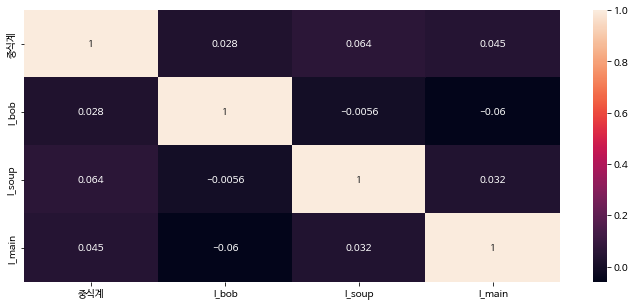

In [275]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df[['중식계','l_bob',	'l_soup',	'l_main']].corr(), annot=True)

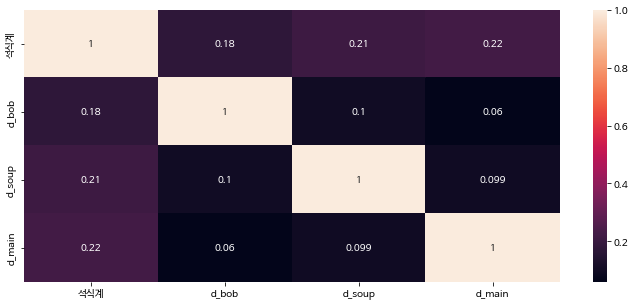

In [276]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df[['석식계','d_bob',	'd_soup',	'd_main']].corr(), annot=True)

흑흑 상관관계는 없다 .......... !

#### 자주 나오는 메뉴

In [356]:
lmenu = train2['l_main'].value_counts().sort_values(ascending=False).reset_index()
dmenu = train2['d_main'].value_counts().sort_values(ascending=False).reset_index()

#### 인기 메뉴

In [357]:
lmenu['best'] = train2.groupby('l_main').sum()['중식계'].sort_values(ascending=False).reset_index()['중식계']
dmenu['best'] = train2.groupby('d_main').sum()['석식계'].sort_values(ascending=False).reset_index()['석식계']

In [371]:
lmenu.sort_values(by='best',ascending=False)[:50]

,menu,count,best,ratio
0,오징어볶음,32,30920.0,966.250000
1,닭갈비,30,29668.0,988.933333
2,버섯불고기,29,26693.0,920.448276
3,훈제오리구이,27,26594.0,984.962963
4,돈육굴소스볶음,25,24840.0,993.600000
5,짬뽕불고기,24,24321.0,1013.375000
6,제육볶음,23,22297.0,969.434783
7,등갈비김치찜,21,17329.0,825.190476
8,언양식불고기,20,17131.0,856.550000
9,주꾸미볶음,19,16550.0,871.052632


In [373]:
dmenu.sort_values(by='best',ascending=False)[:50]

,menu,count,best,ratio
0,None,41,8202.0,200.048780
1,떡볶이,16,7365.0,460.312500
2,닭갈비,16,6771.0,423.187500
3,돈육강정,15,6768.0,451.200000
4,고추잡채*꽃빵,14,6416.0,458.285714
5,유린기,14,6398.0,457.000000
6,돈육장조림,14,6376.0,455.428571
7,돈육굴소스볶음,14,6132.0,438.000000
8,깐풍기,14,6035.0,431.071429
9,고등어구이,13,5902.0,454.000000


In [358]:
lmenu = lmenu.rename(columns={'index':'menu', 'l_main':'count'})
dmenu = dmenu.rename(columns={'index':'menu', 'd_main':'count'})

In [359]:
lmenu['ratio'] = lmenu['best'] / lmenu['count']
dmenu['ratio'] = dmenu['best'] / dmenu['count']

In [347]:
train2[train2['d_main']=='None']

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,l_bob,l_soup,l_main,d_bob,d_soup,d_main
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,나물비빔밥,가쯔오장국,치킨핑거*요거트D,None,None,None
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,콩나물밥,가쯔오장국,미트볼케찹조림,None,None,None
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,카레덮밥,맑은국,유린기,None,None,None
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,나물비빔밥,유부장국,생선까스*탈탈소스,None,None,None
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0,쌀밥/잡곡밥,돈육김치찌개,유린기,None,None,None
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0,비빔밥,맑은국,오징어튀김,None,None,None
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0,열무보리비빔밥,가쯔오장국,탕수만두,None,None,None
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0,콩나물밥,얼갈이된장국,삼치구이,None,None,None
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0,나물비빔밥,미소장국,파스타샐러드,None,None,None
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0,쌀밥/잡곡밥,시래기국,훈제오리구이,None,None,None


In [355]:
train2 = train2.drop(train2[train2['일자']=='2018-06-22'].index)

저녁 메뉴가 없는데 석식계가 448명인날 삭제

In [365]:
dmenu.sort_values(by='ratio', ascending=False)[:50]['menu']

186            궁중떡찜
187         훈제오리떡볶음
188         춘권*칠리소스
189            미니버거
190            버섯탕수
191           치즈닭갈비
192         등갈비묵은지찜
193     팝콘치킨*데리야끼소스
194          목살간장조림
195           단호박조림
196         고등어양념구이
197           풋고추튀김
198          비빔야채만두
199        펜네베이컨샐러드
200         고구마오븐구이
201          샐러드파스타
202         돈육모듬장조림
203         코다리엿장조림
204        브로컬리크림스프
205             닭볶음
206           모듬떡볶이
207        쇠고기모둠장조림
208             탕평채
209         수제칠리핫도그
210       새우까스*타르타르
211              춘권
212        감자치즈오븐구이
213           순살닭갈비
215           삼치양념찜
214         치즈시즈닝치킨
216        새우또띠아/음료
217             짜장면
218         돈육계란장조림
219            돈육볶음
220          훈제오리구이
221    훈제오리/무쌈/양파절임
222           왕새우튀김
223           시저샐러드
224          등뼈묵은지찜
225          또띠아견과칩
226        연근/고구마튀김
227       모둠튀김*칠리소스
228             단무지
229           봄나물튀김
230        케이준치킨샐러드
231       너비아니*부추생채
232         쇠고기야채볶음
120           수제핫도그
233          데리야끼파닭
234            계란말이


In [366]:
lmenu.sort_values(by='ratio', ascending=False)[:50]['menu']

159        꼬지삼색전
160     목살데리야끼구이
161       매콤낙지볶음
162         간장치킨
163        쇠고기볶음
164       쇠고기불고기
165         양념파닭
166         궁중떡찜
167       돈간장불고기
168      매콤떡갈비조림
169      꽁치김치말이찜
170      간장돼지갈비찜
171         꽁치구이
172         불닭볶음
173       훈제오리냉채
174        꽃맛살볶음
175    새우까스&탈탈소스
176        갈릭돈가스
177         계란말이
178    오리훈제고추장볶음
179       너비아니구이
180         임연수찜
104        칠리탕수육
181         간장파닭
105         양념치킨
182       단호박장조림
183    치킨텐더*요거트D
184      쇠불고기/잡채
185      자반고등어구이
186       삼치된장구이
187      소세지피망볶음
188     매콤함박스테이크
189      양념돼지갈비찜
190        삼치무조림
191        고구마튀김
192      쇠고기버섯볶음
106       샐러드파스타
107         닭매운찜
193        매운동태찜
194        동그랑땡전
195     스위트칠리미트볼
196    팝콘치킨*데리마요
197        순살닭갈비
198        치킨커틀렛
199      닭가슴살장조림
200       오이달래무침
108        갈릭돈까스
201    훈제오리구이/쌈무
203     돈육꽈리고추볶음
202        닭감자조림
Name: menu, dtype: object